In [11]:
import numpy as np
import pandas as pd

from mimic.data_imputation.impute_GP import GPImputer

In [12]:
data = pd.read_csv('Stein_example_F.csv')

In [13]:
# Dictionary to hold DataFrames for each unique ID
sample_dfs = {}

for sample_id in data['ID'].unique():
    # Filter data for each sample ID
    sample_data = data[data['ID'] == sample_id].copy()

    # Shift time points to start from 0
    sample_data['time'] = sample_data['time'] - sample_data['time'].min()

    # Store DataFrame in dictionary
    sample_dfs[sample_id] = sample_data

# Display a sample DataFrame for verification
sample_dfs[1].head(20)  # Display the DataFrame for sample ID 1

,ID,time,undefined_genus_of_Enterobacteriaceae,Blautia,Barnesiella,undefined_genus_of_unclassified_Mollicutes,undefined_genus_of_Lachnospiraceae,Akkermansia,Clostridium_difficile,unclassified_Lachnospiraceae,Coprobacillus,Enterococcus,Other
0,1,0,5.25900,-1.536500,-3.157200,-0.72794,-3.778700,-2.561400,0.0,-3.033100,0.280350,2.07960,-1.65810
1,1,2,-0.73919,5.195600,-0.264510,0.42863,-0.264520,5.569500,0.0,-0.264720,1.967400,-0.82412,-0.44685
2,1,3,2.50860,-0.424610,2.907600,2.17330,2.907600,-1.697600,0.0,2.907600,6.399700,4.98700,5.10480
3,1,4,-2.47510,6.226000,-1.014700,-1.01470,-1.014700,3.979200,0.0,-1.014700,-6.452700,-2.17780,-1.54420
4,1,5,-0.58042,0.082481,-0.217980,-0.21801,-0.218000,-0.484480,0.0,-0.217620,-0.504010,-2.52060,-1.99110
5,1,6,-0.52380,-3.085500,-1.861500,2.85240,-1.861500,-0.092136,0.0,-1.862000,-1.861500,1.02880,-1.57390
6,1,7,0.59652,-0.038938,0.058401,0.81097,0.058389,-3.804400,0.0,0.058219,0.058405,-1.04020,0.69655
7,1,9,0.07182,0.134260,0.149210,0.21998,0.149210,0.149210,0.0,0.149330,0.149210,-0.53718,-0.18033
8,1,12,-1.29670,-0.889530,-0.822160,-0.61591,-0.822140,-0.822150,0.0,-0.822110,-0.822150,-0.48064,-0.40463
9,1,16,0.21910,0.179860,0.120090,0.11893,0.120090,0.120090,0.0,0.120130,0.120090,0.12009,0.13895


In [14]:
# Process each sample DataFrame to include all time points from 0 to max with NaN for missing rows
for sample_id in sample_dfs:
    # Get the maximum time point for the current sample
    max_time = sample_dfs[sample_id]['time'].max()

    # Create a new index that includes all time points from 0 to max_time
    full_time_index = pd.RangeIndex(start=0, stop=max_time + 1, step=1)

    # Reindex the DataFrame using the new full time index
    sample_dfs[sample_id] = sample_dfs[sample_id].set_index(
        'time').reindex(full_time_index).reset_index()
    # Fill in the sample ID for new rows which will be NaN after reindexing
    sample_dfs[sample_id]['ID'].fillna(sample_id, inplace=True)

# Display the adjusted DataFrame for sample ID 1 to verify the changes
# Display the first 15 rows to see the complete range including NaNs
sample_dfs[1].head(15)

,index,ID,undefined_genus_of_Enterobacteriaceae,Blautia,Barnesiella,undefined_genus_of_unclassified_Mollicutes,undefined_genus_of_Lachnospiraceae,Akkermansia,Clostridium_difficile,unclassified_Lachnospiraceae,Coprobacillus,Enterococcus,Other
0,0,1.0,5.25900,-1.536500,-3.157200,-0.72794,-3.778700,-2.561400,0.0,-3.033100,0.280350,2.07960,-1.65810
1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,-0.73919,5.195600,-0.264510,0.42863,-0.264520,5.569500,0.0,-0.264720,1.967400,-0.82412,-0.44685
3,3,1.0,2.50860,-0.424610,2.907600,2.17330,2.907600,-1.697600,0.0,2.907600,6.399700,4.98700,5.10480
4,4,1.0,-2.47510,6.226000,-1.014700,-1.01470,-1.014700,3.979200,0.0,-1.014700,-6.452700,-2.17780,-1.54420
5,5,1.0,-0.58042,0.082481,-0.217980,-0.21801,-0.218000,-0.484480,0.0,-0.217620,-0.504010,-2.52060,-1.99110
6,6,1.0,-0.52380,-3.085500,-1.861500,2.85240,-1.861500,-0.092136,0.0,-1.862000,-1.861500,1.02880,-1.57390
7,7,1.0,0.59652,-0.038938,0.058401,0.81097,0.058389,-3.804400,0.0,0.058219,0.058405,-1.04020,0.69655
8,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1.0,0.07182,0.134260,0.149210,0.21998,0.149210,0.149210,0.0,0.149330,0.149210,-0.53718,-0.18033


In [15]:
data = sample_dfs[1]

data

,index,ID,undefined_genus_of_Enterobacteriaceae,Blautia,Barnesiella,undefined_genus_of_unclassified_Mollicutes,undefined_genus_of_Lachnospiraceae,Akkermansia,Clostridium_difficile,unclassified_Lachnospiraceae,Coprobacillus,Enterococcus,Other
0,0,1.0,5.25900,-1.536500,-3.157200,-0.72794,-3.778700,-2.561400,0.0,-3.033100,0.280350,2.07960,-1.65810
1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,-0.73919,5.195600,-0.264510,0.42863,-0.264520,5.569500,0.0,-0.264720,1.967400,-0.82412,-0.44685
3,3,1.0,2.50860,-0.424610,2.907600,2.17330,2.907600,-1.697600,0.0,2.907600,6.399700,4.98700,5.10480
4,4,1.0,-2.47510,6.226000,-1.014700,-1.01470,-1.014700,3.979200,0.0,-1.014700,-6.452700,-2.17780,-1.54420
5,5,1.0,-0.58042,0.082481,-0.217980,-0.21801,-0.218000,-0.484480,0.0,-0.217620,-0.504010,-2.52060,-1.99110
6,6,1.0,-0.52380,-3.085500,-1.861500,2.85240,-1.861500,-0.092136,0.0,-1.862000,-1.861500,1.02880,-1.57390
7,7,1.0,0.59652,-0.038938,0.058401,0.81097,0.058389,-3.804400,0.0,0.058219,0.058405,-1.04020,0.69655
8,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1.0,0.07182,0.134260,0.149210,0.21998,0.149210,0.149210,0.0,0.149330,0.149210,-0.53718,-0.18033


In [16]:
data['Blautia'].isnull()

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10     True
11     True
12    False
13     True
14     True
15     True
16    False
17     True
18     True
19     True
20     True
21     True
22     True
23    False
Name: Blautia, dtype: bool

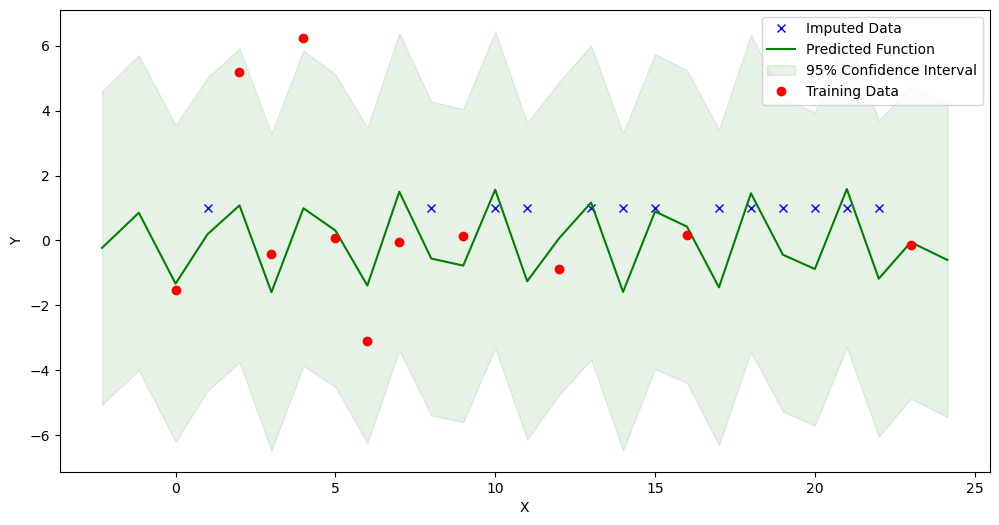

In [17]:
data['index'] = data['index'].astype(float)
new_dataset = GPImputer().impute_missing_values(data, ['index'], 'Blautia')
